In [1]:
import xarray as xr
import numpy as np
import dask.array as da
import matplotlib.pyplot as plt
import os
from dask.distributed import Client, LocalCluster
from datetime import datetime,timedelta
import glob
import rioxarray
import xarray as xr
from glob import glob
import rioxarray as rio
import cftime
import indices_function as ifun
import geopandas as gpd


In [2]:
cluster = LocalCluster(
    n_workers=10, 
    threads_per_worker=1,
    timeout='3600s',
    memory_limit='5GB',   
)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 10,Total memory: 46.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41041,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 46.57 GiB
Comm: tcp://127.0.0.1:35277,Total threads: 1
Dashboard: http://127.0.0.1:44663/status,Memory: 4.66 GiB
Nanny: tcp://127.0.0.1:34125,


In [1]:
!ls /nobackupp28/skhajehe/hawaii_rea/

hawaii_reanalysis_max.zarr	      hawaii_reanalysis_tasmax_quantile.zarr
hawaii_reanalysis_min.zarr	      hawaii_reanalysis_tasmin_annual.zarr
hawaii_reanalysis_pr_annual.zarr      hawaii_reanalysis_tasmin_quantile.zarr
hawaii_reanalysis_pr_quantile.zarr    seasonal_pr.zarr
hawaii_reanalysis_pr.zarr	      seasonal_tasmax.zarr
hawaii_reanalysis_tasmax_annual.zarr  seasonal_tasmin.zarr


In [56]:
reanalysis=xr.open_zarr("/nobackupp28/skhajehe/hawaii_rea/seasonal_pr.zarr")
gcm=xr.open_zarr("/nobackupp28/skhajehe/hawaii_multi/pr/seasonal.zarr")
gcm['lon'] = (gcm['lon'] + 180) % 360 - 180
gcm = gcm.sortby(gcm.lon)
gcm.load()
reanalysis.load()

<xarray.Dataset> Size: 28MB
Dimensions:      (lat: 1520, lon: 2288, season: 2)
Coordinates:
  * lat          (lat) float64 12kB 22.27 22.27 22.26 ... 18.85 18.85 18.85
  * lon          (lon) float64 18kB -159.8 -159.8 -159.8 ... -154.7 -154.7
  * season       (season) object 16B 'summer' 'winter'
Data variables:
    pr           (season, lat, lon) float32 28MB nan nan nan nan ... nan nan nan
    spatial_ref  (season) int64 16B 0 0

In [67]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define intervals with non-linear spacing
intervals = [0, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10, 12, 14]

# Select 20 colors from YlGn colormap
colors = plt.cm.viridis_r(np.linspace(0, 1, 13))

# Create a custom colormap with specified intervals and colors
cmap = mcolors.ListedColormap(colors)
bounds = mcolors.BoundaryNorm(intervals, cmap.N)


/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/2366061446.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


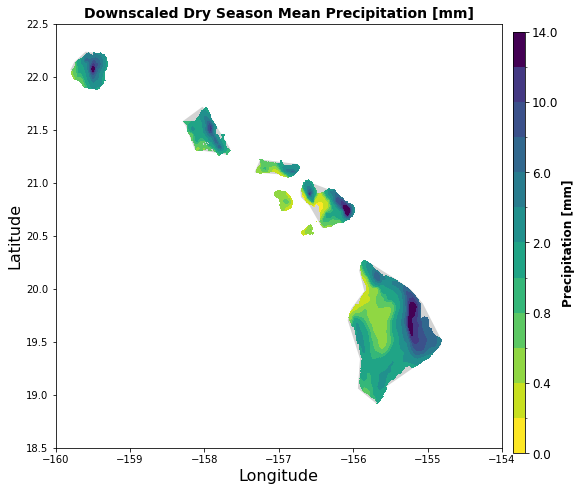

In [68]:
fig, ax = plt.subplots(figsize=(8, 8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = gcm.pr.sel(season="summer").plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Downscaled Dry Season Mean Precipitation [mm]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Precipitation [mm]',fontweight='bold', fontsize=12)
cbar.ax.yaxis.set_tick_params(labelsize='large')

plt.savefig('./plot/dry_precip_gcms.png', bbox_inches='tight')
plt.show()

/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/3564540443.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


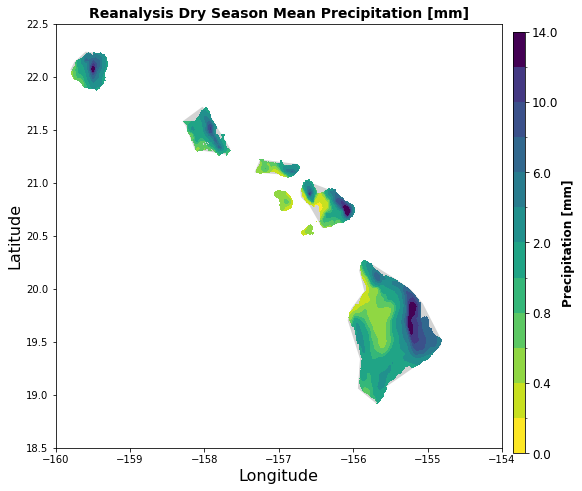

In [69]:
fig, ax = plt.subplots(figsize=(8,8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = reanalysis.pr.sel(season="summer").plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Reanalysis Dry Season Mean Precipitation [mm]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Precipitation [mm]',fontweight='bold', fontsize=12)
cbar.ax.yaxis.set_tick_params(labelsize='large')
plt.savefig('./plot/dry_precip_reanalysis.png', bbox_inches='tight')
plt.show()


In [63]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define color intervals and corresponding colors
intervals = np.arange(-2, 2.2, 0.2)
colors = plt.cm.PuOr(np.linspace(0, 1, len(intervals) - 1))  # Use YlOrRd colormap

# Create a custom colormap with specified intervals and colors
cmap = mcolors.ListedColormap(colors)
bounds = mcolors.BoundaryNorm(intervals, cmap.N)



/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/4205175451.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


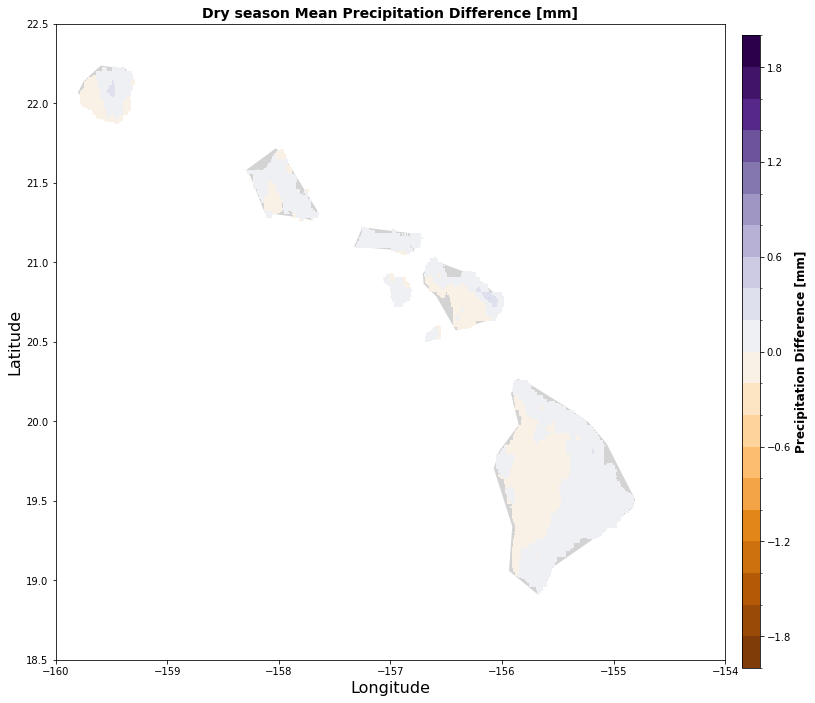

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=1)

plot = (gcm-reanalysis).pr.sel(season="summer").plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' , add_colorbar=False)
# Add state boundaries

# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Dry season Mean Precipitation Difference [mm]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Precipitation Difference [mm]',fontweight='bold', fontsize=12)
plt.savefig('./plot/dry_precip_dif.png', bbox_inches='tight')


In [23]:
!ls /nobackupp28/skhajehe/hawaii_rea/

hawaii_reanalysis_max.zarr	      hawaii_reanalysis_tasmax_quantile.zarr
hawaii_reanalysis_min.zarr	      hawaii_reanalysis_tasmin_annual.zarr
hawaii_reanalysis_pr_annual.zarr      hawaii_reanalysis_tasmin_quantile.zarr
hawaii_reanalysis_pr_quantile.zarr    seasonal_pr.zarr
hawaii_reanalysis_pr.zarr	      seasonal_tasmax.zarr
hawaii_reanalysis_tasmax_annual.zarr  seasonal_tasmin.zarr


In [44]:
reanalysis=xr.open_zarr("/nobackupp28/skhajehe/hawaii_rea/seasonal_tasmin.zarr")
gcm=xr.open_zarr("/nobackupp28/skhajehe/hawaii_multi/tasmin/seasonal.zarr")
gcm['lon'] = (gcm['lon'] + 180) % 360 - 180
gcm = gcm.sortby(gcm.lon)
reanalysis.load()
gcm.load()

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1520, lon: 2288, season: 2)
Coordinates:
  * lat      (lat) float64 12kB 18.85 18.85 18.85 18.86 ... 22.26 22.27 22.27
  * lon      (lon) float64 18kB -159.8 -159.8 -159.8 ... -154.7 -154.7 -154.7
  * season   (season) object 16B 'summer' 'winter'
Data variables:
    tasmin   (season, lat, lon) float32 28MB nan nan nan nan ... nan nan nan nan

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define color intervals and corresponding colors
intervals = np.arange(0, 30, 2)
colors = plt.cm.inferno_r(np.linspace(0, 1, len(intervals) - 1))  # Use YlOrRd colormap

# Create a custom colormap with specified intervals and colors
cmap = mcolors.ListedColormap(colors)
bounds = mcolors.BoundaryNorm(intervals, cmap.N)


/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/2775745312.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


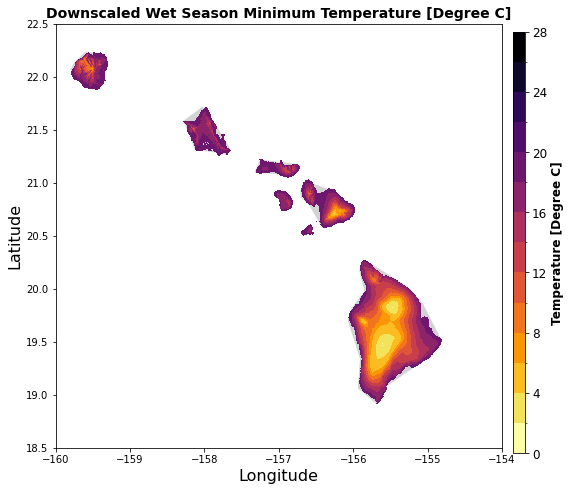

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = gcm.tasmin.sel(season="winter").plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Downscaled Wet Season Minimum Temperature [Degree C]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Temperature [Degree C]',fontweight='bold', fontsize=12)
cbar.ax.yaxis.set_tick_params(labelsize='large')
# plt.show()
plt.savefig('./plot/min_wet_gcms.png', bbox_inches='tight')


/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/1579329164.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


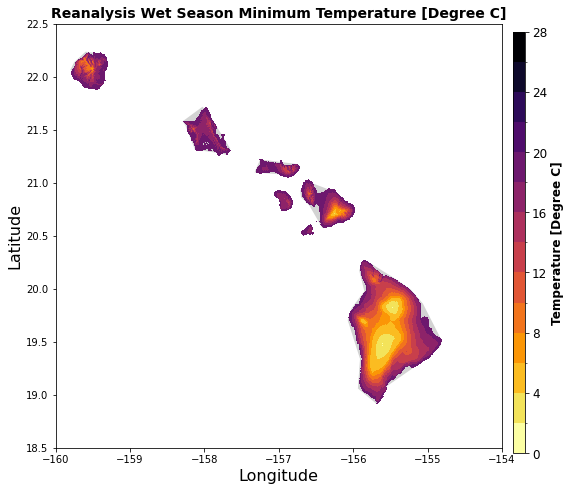

In [53]:
fig, ax = plt.subplots(figsize=(8,8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = reanalysis.tasmin.sel(season="winter").plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Reanalysis Wet Season Minimum Temperature [Degree C]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Temperature [Degree C]',fontweight='bold', fontsize=12)
cbar.ax.yaxis.set_tick_params(labelsize='large')
# plt.show()
plt.savefig('./plot/min_wet_reanalysis.png', bbox_inches='tight')


In [54]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define color intervals and corresponding colors
intervals= np.arange(-0.1, 0.11, 0.01)
colors= plt.cm.PuOr_r(np.linspace(0, 1, len(intervals) - 1))  # Use YlOrRd colormap

# Create a custom colormap with specified intervals and colors
cmap= mcolors.ListedColormap(colors)
bounds= mcolors.BoundaryNorm(intervals, cmap.N)




/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/1729784095.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


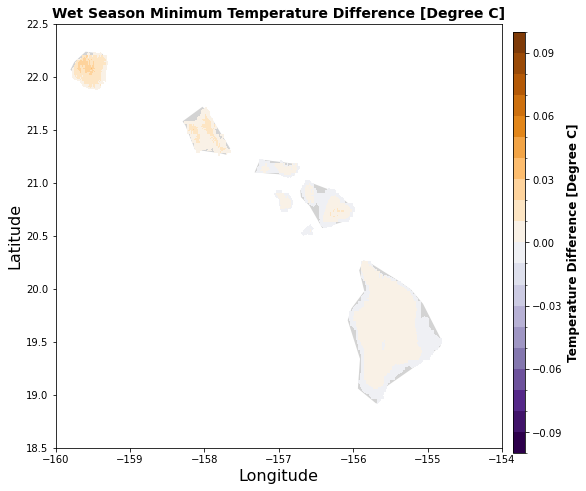

In [55]:
fig, ax = plt.subplots(figsize=(8,8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=1)

plot = (gcm-reanalysis).tasmin.sel(season="winter").plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' , add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Wet Season Minimum Temperature Difference [Degree C]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Temperature Difference [Degree C]',fontweight='bold', fontsize=12)
plt.savefig('./plot/min_wet_diff.png', bbox_inches='tight')


In [75]:
!ls /nobackupp28/skhajehe/hawaii_rea/

hawaii_reanalysis_max.zarr	      hawaii_reanalysis_tasmax_quantile.zarr
hawaii_reanalysis_min.zarr	      hawaii_reanalysis_tasmin_annual.zarr
hawaii_reanalysis_pr_annual.zarr      hawaii_reanalysis_tasmin_quantile.zarr
hawaii_reanalysis_pr_quantile.zarr    seasonal_pr.zarr
hawaii_reanalysis_pr.zarr	      seasonal_tasmax.zarr
hawaii_reanalysis_tasmax_annual.zarr  seasonal_tasmin.zarr


In [79]:
# var="pr"
# DCP_base=xr.open_zarr("/nobackupp28/skhajehe/dcp-indices/multimodel/annual_average/"+var+"/2014.zarr")

datasets=[]
models=glob("/nobackupp28/skhajehe/hawaii_multi/pr/quantiles/*.zarr")
# List of file names
for model in models:
    if any(x in model for x in ["one","test"]):
        print(model)
        continue
    X1=xr.open_zarr(model,consolidated=False)
    datasets.append(X1)
DCP = xr.concat(datasets, dim='model').mean(dim="model")
# DCP=DCP.where(DCP_base[var].notnull())

PRISM=xr.open_zarr("/nobackupp28/skhajehe/hawaii_rea/hawaii_reanalysis_pr_quantile.zarr")
# PRISM=PRISM.where(DCP_base[var].notnull())

DCP['lon'] = (DCP['lon'] + 180) % 360 - 180
DCP = DCP.sortby(DCP.lon)
# PRISM['lon'] = (PRISM['lon'] + 180) % 360 - 180
# PRISM = PRISM.sortby(PRISM.lon)
DCP.load()
PRISM.load()
gcm=DCP
reanalysis=PRISM

In [81]:
gcm

<xarray.Dataset> Size: 111MB
Dimensions:   (lat: 1520, lon: 2288, quantile: 4)
Coordinates:
  * lat       (lat) float64 12kB 18.85 18.85 18.85 18.86 ... 22.26 22.27 22.27
  * lon       (lon) float64 18kB -159.8 -159.8 -159.8 ... -154.7 -154.7 -154.7
  * quantile  (quantile) float64 32B 0.25 0.5 0.75 0.9
Data variables:
    pr        (quantile, lat, lon) float64 111MB nan nan nan nan ... nan nan nan

In [106]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define intervals with non-linear spacing
intervals = [0, 0.2, 0.4, 0.6, 0.8, 1, 4, 8, 12, 18, 26, 32, 40]

# Select 20 colors from YlGn colormap
colors = plt.cm.viridis_r(np.linspace(0, 1, 13))

# Create a custom colormap with specified intervals and colors
cmap = mcolors.ListedColormap(colors)
bounds = mcolors.BoundaryNorm(intervals, cmap.N)


/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/3111683340.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


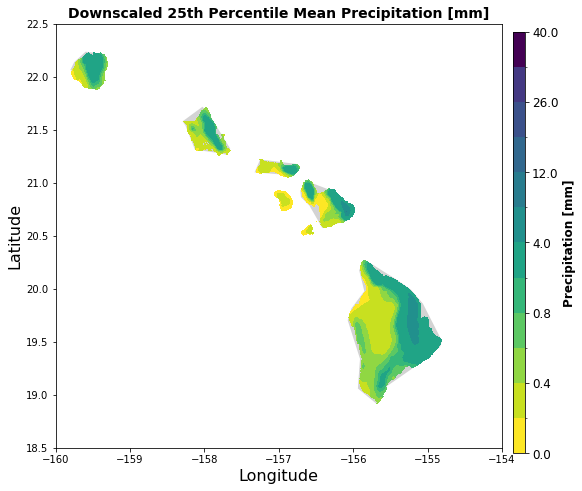

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = gcm.pr.sel(quantile=0.25).plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Downscaled 25th Percentile Mean Precipitation [mm]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Precipitation [mm]',fontweight='bold', fontsize=12)
cbar.ax.yaxis.set_tick_params(labelsize='large')

plt.savefig('./plot/0.25_precip_gcms.png', bbox_inches='tight')
plt.show()

/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/2368222708.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


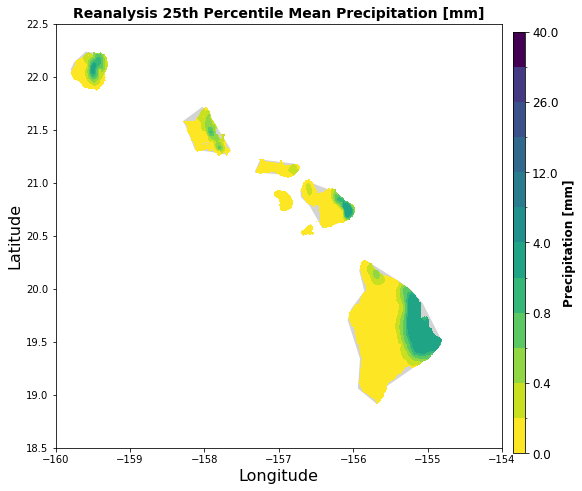

In [112]:
fig, ax = plt.subplots(figsize=(8,8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = reanalysis.pr.sel(quantile=0.25).plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('Reanalysis 25th Percentile Mean Precipitation [mm]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Precipitation [mm]',fontweight='bold', fontsize=12)
cbar.ax.yaxis.set_tick_params(labelsize='large')
plt.savefig('./plot/0.25_precip_reanalysis.png', bbox_inches='tight')
plt.show()


In [102]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define color intervals and corresponding colors
intervals = np.arange(-5, 5.2, 0.2)
colors = plt.cm.PuOr(np.linspace(0, 1, len(intervals) - 1))  # Use YlOrRd colormap

# Create a custom colormap with specified intervals and colors
cmap = mcolors.ListedColormap(colors)
bounds = mcolors.BoundaryNorm(intervals, cmap.N)



/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/158248155.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


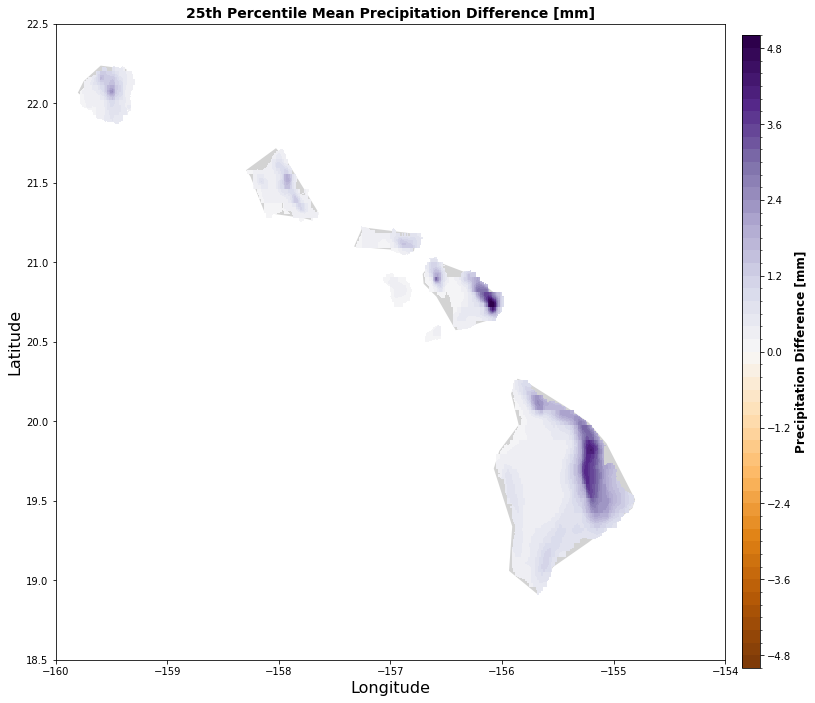

In [105]:
fig, ax = plt.subplots(figsize=(12, 12))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=1)

plot = (gcm-reanalysis).pr.sel(quantile=0.25).plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' , add_colorbar=False)
# Add state boundaries

# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('25th Percentile Mean Precipitation Difference [mm]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Precipitation Difference [mm]',fontweight='bold', fontsize=12)
plt.savefig('./plot/0.25_precip_dif.png', bbox_inches='tight')


In [138]:


datasets=[]
models=glob("/nobackupp28/skhajehe/hawaii_multi/tasmax/quantiles/*.zarr")
# List of file names
for model in models:
    if any(x in model for x in ["one","test"]):
        print(model)
        continue
    X1=xr.open_zarr(model,consolidated=False)
    datasets.append(X1)
DCP = xr.concat(datasets, dim='model').mean(dim="model")
# DCP=DCP.where(DCP_base[var].notnull())

PRISM=xr.open_zarr("/nobackupp28/skhajehe/hawaii_rea/hawaii_reanalysis_tasmax_quantile.zarr")
# PRISM=PRISM.where(DCP_base[var].notnull())

DCP['lon'] = (DCP['lon'] + 180) % 360 - 180
DCP = DCP.sortby(DCP.lon)
# PRISM['lon'] = (PRISM['lon'] + 180) % 360 - 180
# PRISM = PRISM.sortby(PRISM.lon)
DCP.load()
PRISM.load()
gcm=DCP
reanalysis=PRISM

In [140]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define color intervals and corresponding colors
intervals = np.arange(0, 35, 2)
colors = plt.cm.inferno_r(np.linspace(0, 1, len(intervals) - 1))  # Use YlOrRd colormap

# Create a custom colormap with specified intervals and colors
cmap = mcolors.ListedColormap(colors)
bounds = mcolors.BoundaryNorm(intervals, cmap.N)


/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/1261512929.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


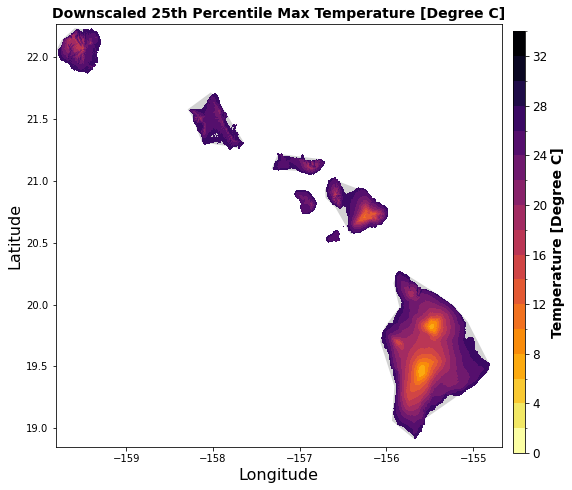

In [147]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = gcm.tasmax.sel(quantile=0.25).plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)

plt.title('Downscaled 25th Percentile Max Temperature [Degree C]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)
cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Temperature [Degree C]',fontweight='bold', fontsize=14)
cbar.ax.yaxis.set_tick_params(labelsize='large')

plt.savefig('./plot/0.25_max_gcm.png', bbox_inches='tight')


/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/503482533.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


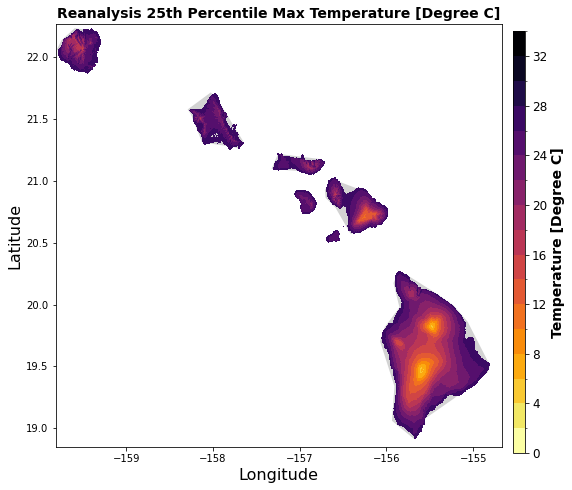

In [150]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=20)

plot = reanalysis.tasmax.sel(quantile=0.25).plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' ,add_colorbar=False)

plt.title('Reanalysis 25th Percentile Max Temperature [Degree C]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Temperature [Degree C]',fontweight='bold', fontsize=14)
cbar.ax.yaxis.set_tick_params(labelsize='large')
# plt.show()
plt.savefig('./plot/0.25_max_reanalysis.png', bbox_inches='tight')


In [151]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define color intervals and corresponding colors
intervals= np.arange(-2, 2, 0.1)
colors= plt.cm.PuOr_r(np.linspace(0, 1, len(intervals) - 1))  # Use YlOrRd colormap

# Create a custom colormap with specified intervals and colors
cmap= mcolors.ListedColormap(colors)
bounds= mcolors.BoundaryNorm(intervals, cmap.N)




/var/tmp/pbs.203282.pbspl4.nas.nasa.gov/ipykernel_4084774/1318514909.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


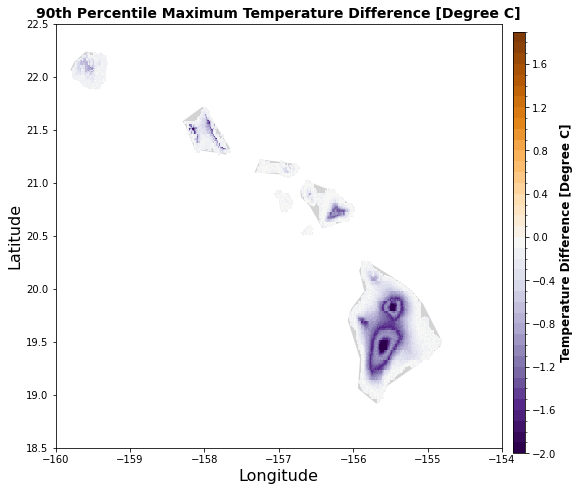

In [155]:
fig, ax = plt.subplots(figsize=(8,8))
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states[usa_states['continent'] == 'North America'].plot(ax=ax, edgecolor='none', facecolor='lightgrey', linewidth=0.8)
# cmap = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=1)

plot = (gcm-reanalysis).tasmax.sel(quantile=0.9).plot(ax=ax,cmap=cmap, norm=bounds,levels=intervals, extend='both' , add_colorbar=False)
# Add state boundaries
# states = gpd.read_file("conus.geojson")
# states.boundary.plot(ax=ax, linewidth=0.8, color='black')
# Setting x and y axis limits
ax.set_xlim(-160, -154)  # Example values, adjust according to your data
ax.set_ylim(18.5, 22.5)  # Example values, adjust according to your data

plt.title('90th Percentile Maximum Temperature Difference [Degree C]', fontweight='bold',fontsize=14)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

cax = fig.add_axes([0.92, 0.125, 0.02, 0.732])  # [left, bottom, width, height]
cbar = plt.colorbar(plot, cax=cax, orientation='vertical',extendfrac='auto')
cbar.set_label('Temperature Difference [Degree C]',fontweight='bold', fontsize=12)
plt.savefig('./plot/0.9_max_diff.png', bbox_inches='tight')
